In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'dog-breeds-details:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2958453%2F5094447%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240610%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240610T185429Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8b77275fa72837626a23fea53015664cc05d4522a0b20852c72c571bf29a5115d982f447ccb6bbf5ddbe5237f578af6797616ceb43bcca39d3e0905c019bf3e600d8f4a2c7fd4dac6ba01087497b1bf3f9b98dc0ef5af4d4cd6d43ae851fc81b64cd7d0b63930c6848817e11ded84e306733c210f177e1360dcc2ec8700ea8e9e51aa1f138b22073f6a5da72a387195c0ee98d8e1b1f2838a761c7060802dc243e0c29d13f0f7b88ff9a007439b253d40a08d224ddbb59ad56cfb921f9d320dd3af7f70f25beccdd68ed47b798cc2ec2a47f9be732eadd2ebdde058b2cff4fef5aff5a09bcdfe7dfcdb8c2e948e7a64a88f246c9ddb30679c276ab68ababe654'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2821 bytes downloaded
Downloaded and uncompressed: dog-breeds-details
Data source import complete.


In [2]:
# Este entorno de Python 3 viene con muchas bibliotecas de análisis útiles instaladas
# Está definido por la imagen de Kaggle/python Docker: https://github.com/kaggle/docker-python
# Por ejemplo, aquí hay varios paquetes útiles para cargar

import numpy as np # algebra lineal
import pandas as pd # procesamiento de datos, E/S de archivo CSV (por ejemplo, pd.read_csv)

# Los archivos de datos de entrada están disponibles en el directorio de solo lectura "../input/"
# Por ejemplo, ejecutar esto (haciendo clic en Ejecutar o presionando Shift+Enter) listará todos los archivos bajo el directorio de entradactory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Puede escribir hasta 20 GB en el directorio actual (/kaggle/working/) que se conserva como salida cuando crea una versión usando "Guardar y ejecutar todo"
# También puede escribir archivos temporales en /kaggle/temp/, pero no se guardarán fuera de la sesión actual

/kaggle/input/dog-breeds-details/dog_breeds.csv


El conjunto de datos contiene 97 razas de perros únicas y sus diversos atributos.

La primera columna representa el nombre de la raza.

Las siguientes 2 columnas indican la esperanza de vida general.

Luego las siguientes 8 columnas son el peso y la altura del género masculino y femenino.

Después de eso, hay 12 columnas que representan diferentes atributos de las razas de perros, como el largo del pelaje, la alegría y la capacidad de entrenamiento. Estas columnas tienen valores que van de 0 a 5. Ejemplo: una raza con un valor de energía de 5 muestra que las razas correspondientes tienen una energía muy alta.

In [3]:
import pandas as pd # impotamos la librería pandas

In [4]:
dog_df = pd.read_csv("/kaggle/input/dog-breeds-details/dog_breeds.csv")  # leemos el archivo de razas de perros
dog_df

,Name,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
0,Golden Retriever,10,12,24.0,24.0,75.0,65.0,23.0,23.0,65.0,...,4,2,2,1,5,4,3,5,3,1
1,Dachshund,12,16,9.0,9.0,32.0,32.0,8.0,8.0,16.0,...,2,2,2,2,4,4,4,4,3,5
2,Labrador Retriever,10,12,24.5,24.5,80.0,70.0,22.5,22.5,65.0,...,4,2,2,1,5,5,3,5,5,3
3,Great Dane,7,10,32.0,32.0,175.0,140.0,30.0,30.0,140.0,...,3,1,4,1,3,4,5,3,4,3
4,Boxer,10,12,25.0,25.0,80.0,65.0,23.0,23.0,65.0,...,2,2,3,1,4,4,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,American Staffordshire Terrier,12,16,19.0,19.0,70.0,55.0,18.0,18.0,55.0,...,2,1,1,1,4,3,5,3,3,3
93,Australian Shepherd,12,15,23.0,23.0,65.0,55.0,20.0,20.0,50.0,...,3,2,1,1,3,4,3,5,5,3
94,Pembroke Welsh Corgi,12,13,12.0,12.0,31.0,28.0,10.0,10.0,24.0,...,4,2,1,1,4,4,5,4,4,4
95,Yorkshire Terrier,11,15,8.0,8.0,7.0,7.0,7.0,7.0,7.0,...,1,5,1,1,5,4,5,4,4,4


In [5]:
dog_df.head #vemos los encabezados de las primeras 5 filas y las últimas 5 filas

<bound method NDFrame.head of                               Name  min_life_expectancy  max_life_expectancy  \
0                 Golden Retriever                   10                   12   
1                        Dachshund                   12                   16   
2               Labrador Retriever                   10                   12   
3                       Great Dane                    7                   10   
4                            Boxer                   10                   12   
..                             ...                  ...                  ...   
92  American Staffordshire Terrier                   12                   16   
93             Australian Shepherd                   12                   15   
94            Pembroke Welsh Corgi                   12                   13   
95               Yorkshire Terrier                   11                   15   
96                  French Bulldog                   10                   12   

    max_height_male  max_height_female  max_weight_male  max_weight_female  \
0              24.0               24.0             75.0               65.0   
1               9.0                9.0             32.0               32.0   
2              24.5               24.5             80.0               70.0   
3              32.0               32.0            175.0              140.0   
4              25.0               25.0             80.0               65.0   
..              ...                ...              ...                ...   
92             19.0               19.0             70.0               55.0   
93             23.0               23.0             65.0               55.0   
94             12.0               12.0             31.0               28.0   
95              8.0                8.0              7.0                7.0   
96             13.0               13.0             28.0               26.0   

    min_height_male  min_height_female  min_weight_male  ...  shedding  \
0              23.0               23.0             65.0  ...         4   
1               8.0                8.0             16.0  ...         2   
2              22.5               22.5             65.0  ...         4   
3              30.0               30.0            140.0  ...         3   
4              23.0               23.0             65.0  ...         2   
..              ...                ...              ...  ...       ...   
92             18.0               18.0             55.0  ...         2   
93             20.0               20.0             50.0  ...         3   
94             10.0               10.0             24.0  ...         4   
95              7.0                7.0              7.0  ...         1   
96             11.0               11.0             20.0  ...         3   

    grooming  drooling  coat_length  good_with_strangers  playfulness  \
0          2         2            1                    5            4   
1          2         2            2                    4            4   
2          2         2            1                    5            5   
3          1         4            1                    3            4   
4          2         3            1                    4            4   
..       ...       ...          ...                  ...          ...   
92         1         1            1                    4            3   
93         2         1            1                    3            4   
94         2         1            1                    4            4   
95         5         1            1                    5            4   
96         1         3            1                    5            5   

    protectiveness  trainability  energy  barking  
0                3             5       3        1  
1                4             4       3        5  
2                3             5       5        3  
3                5             3       4        3  
4                4             4       4      

In [6]:
dog_df.tail() #vemos las últimas 5 filas


,Name,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
92,American Staffordshire Terrier,12,16,19.0,19.0,70.0,55.0,18.0,18.0,55.0,...,2,1,1,1,4,3,5,3,3,3
93,Australian Shepherd,12,15,23.0,23.0,65.0,55.0,20.0,20.0,50.0,...,3,2,1,1,3,4,3,5,5,3
94,Pembroke Welsh Corgi,12,13,12.0,12.0,31.0,28.0,10.0,10.0,24.0,...,4,2,1,1,4,4,5,4,4,4
95,Yorkshire Terrier,11,15,8.0,8.0,7.0,7.0,7.0,7.0,7.0,...,1,5,1,1,5,4,5,4,4,4
96,French Bulldog,10,12,13.0,13.0,28.0,26.0,11.0,11.0,20.0,...,3,1,3,1,5,5,3,4,3,1


In [7]:
dog_df.shape # obtenemos la dimensión del DataFrame, tiene 97 filas y 23 columnas

(97, 23)

In [8]:
dog_df.columns  #obtenemos el nombre de todas las columnas

Index(['Name', 'min_life_expectancy', 'max_life_expectancy', 'max_height_male',
       'max_height_female', 'max_weight_male', 'max_weight_female',
       'min_height_male', 'min_height_female', 'min_weight_male',
       'min_weight_female', 'good_with_children', 'good_with_other_dogs',
       'shedding', 'grooming', 'drooling', 'coat_length',
       'good_with_strangers', 'playfulness', 'protectiveness', 'trainability',
       'energy', 'barking'],
      dtype='object')

In [9]:
dog_df.info() # obtenemos información sobre las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  97 non-null     object 
 1   min_life_expectancy   97 non-null     int64  
 2   max_life_expectancy   97 non-null     int64  
 3   max_height_male       97 non-null     float64
 4   max_height_female     97 non-null     float64
 5   max_weight_male       97 non-null     float64
 6   max_weight_female     97 non-null     float64
 7   min_height_male       97 non-null     float64
 8   min_height_female     97 non-null     float64
 9   min_weight_male       97 non-null     float64
 10  min_weight_female     97 non-null     float64
 11  good_with_children    97 non-null     int64  
 12  good_with_other_dogs  97 non-null     int64  
 13  shedding              97 non-null     int64  
 14  grooming              97 non-null     int64  
 15  drooling              97 

In [10]:
dog_df.duplicated().sum() # sumamos los valores duplicados, en este caso no hay ninguno

0

In [11]:
dog_df.isna().sum() # sumamos los valores nulos, en este caso no hay ninguno

Name                    0
min_life_expectancy     0
max_life_expectancy     0
max_height_male         0
max_height_female       0
max_weight_male         0
max_weight_female       0
min_height_male         0
min_height_female       0
min_weight_male         0
min_weight_female       0
good_with_children      0
good_with_other_dogs    0
shedding                0
grooming                0
drooling                0
coat_length             0
good_with_strangers     0
playfulness             0
protectiveness          0
trainability            0
energy                  0
barking                 0
dtype: int64

In [12]:
dog_df.describe() # contamos valores, obtenemos la media, desviacion std, min, max, percentiles.

,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,min_weight_female,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,11.360825,14.000000,20.561856,20.427835,60.890722,54.292784,18.164948,18.061856,46.024742,40.076289,...,2.587629,2.154639,1.618557,1.020619,3.402062,3.608247,3.659794,3.804124,3.680412,2.958763
std,1.653189,1.870829,6.949692,6.836251,43.281424,36.473518,6.747963,6.656473,34.927431,28.510622,...,0.921418,1.034209,0.983651,0.203069,1.114860,0.984851,1.162671,0.975098,0.907680,1.257623
min,7.000000,9.000000,7.000000,7.000000,6.000000,6.000000,5.000000,5.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,13.000000,15.000000,15.000000,23.000000,22.000000,12.000000,12.000000,15.000000,15.000000,...,2.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,12.000000,14.000000,22.000000,22.000000,60.000000,55.000000,19.000000,19.000000,40.000000,35.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,12.000000,15.000000,27.000000,27.000000,85.000000,71.000000,24.000000,24.000000,65.000000,57.000000,...,3.000000,3.000000,2.000000,1.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000
max,15.000000,19.000000,33.000000,32.000000,200.000000,200.000000,30.000000,30.000000,150.000000,150.000000,...,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [13]:
dog_df['Name'] # filtramos por nombre de la raza

0                   Golden Retriever
1                          Dachshund
2                 Labrador Retriever
3                         Great Dane
4                              Boxer
                   ...              
92    American Staffordshire Terrier
93               Australian Shepherd
94              Pembroke Welsh Corgi
95                 Yorkshire Terrier
96                    French Bulldog
Name: Name, Length: 97, dtype: object

In [14]:
dog_df.sort_values('Name', ascending=True) #

,Name,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
44,Afghan Hound,12,18,27.0,27.0,60.0,60.0,25.0,25.0,50.0,...,1,4,1,1,3,3,3,1,4,3
33,Akita,10,14,28.0,28.0,130.0,100.0,26.0,26.0,100.0,...,3,3,1,1,2,3,5,3,4,2
81,Alaskan Klee Kai,13,16,28.0,28.0,130.0,100.0,26.0,26.0,100.0,...,3,2,0,1,0,0,0,3,4,0
87,Alaskan Malamute,10,14,25.0,25.0,85.0,75.0,25.0,25.0,85.0,...,3,3,1,1,3,3,4,5,4,3
29,American Bulldog,10,12,28.0,24.0,100.0,80.0,20.0,20.0,75.0,...,2,0,0,1,0,0,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,Vizsla,12,14,24.0,24.0,60.0,55.0,22.0,22.0,55.0,...,3,2,2,1,4,5,3,5,5,3
19,West Highland White Terrier,13,15,11.0,11.0,20.0,20.0,11.0,11.0,15.0,...,3,3,1,1,4,5,5,3,4,5
49,Whippet,12,15,22.0,22.0,40.0,40.0,19.0,19.0,25.0,...,2,1,1,1,3,4,3,3,4,1
73,Xoloitzcuintli,13,18,25.0,25.0,60.0,60.0,19.0,19.0,28.0,...,1,1,1,1,3,4,3,4,4,3


In [15]:
dog_df.index # vemos los índices, empieza en 0, termina en 97 y van de uno en uno

RangeIndex(start=0, stop=97, step=1)

In [16]:
dog_df.size #

2231

In [17]:
dog_df.dtypes # obtenemos los tipos de cada columna

Name                     object
min_life_expectancy       int64
max_life_expectancy       int64
max_height_male         float64
max_height_female       float64
max_weight_male         float64
max_weight_female       float64
min_height_male         float64
min_height_female       float64
min_weight_male         float64
min_weight_female       float64
good_with_children        int64
good_with_other_dogs      int64
shedding                  int64
grooming                  int64
drooling                  int64
coat_length               int64
good_with_strangers       int64
playfulness               int64
protectiveness            int64
trainability              int64
energy                    int64
barking                   int64
dtype: object

In [18]:
dog_df.dtypes.value_counts() # contamos los tipos

int64      14
float64     8
object      1
Name: count, dtype: int64

In [19]:
dog_df # volvemos a ver el DataFrame

,Name,min_life_expectancy,max_life_expectancy,max_height_male,max_height_female,max_weight_male,max_weight_female,min_height_male,min_height_female,min_weight_male,...,shedding,grooming,drooling,coat_length,good_with_strangers,playfulness,protectiveness,trainability,energy,barking
0,Golden Retriever,10,12,24.0,24.0,75.0,65.0,23.0,23.0,65.0,...,4,2,2,1,5,4,3,5,3,1
1,Dachshund,12,16,9.0,9.0,32.0,32.0,8.0,8.0,16.0,...,2,2,2,2,4,4,4,4,3,5
2,Labrador Retriever,10,12,24.5,24.5,80.0,70.0,22.5,22.5,65.0,...,4,2,2,1,5,5,3,5,5,3
3,Great Dane,7,10,32.0,32.0,175.0,140.0,30.0,30.0,140.0,...,3,1,4,1,3,4,5,3,4,3
4,Boxer,10,12,25.0,25.0,80.0,65.0,23.0,23.0,65.0,...,2,2,3,1,4,4,4,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,American Staffordshire Terrier,12,16,19.0,19.0,70.0,55.0,18.0,18.0,55.0,...,2,1,1,1,4,3,5,3,3,3
93,Australian Shepherd,12,15,23.0,23.0,65.0,55.0,20.0,20.0,50.0,...,3,2,1,1,3,4,3,5,5,3
94,Pembroke Welsh Corgi,12,13,12.0,12.0,31.0,28.0,10.0,10.0,24.0,...,4,2,1,1,4,4,5,4,4,4
95,Yorkshire Terrier,11,15,8.0,8.0,7.0,7.0,7.0,7.0,7.0,...,1,5,1,1,5,4,5,4,4,4


In [20]:
# Obtenemos una lista de todas las razas de perro en la columna 'Name'
all_breeds = dog_df['Name'].unique()

# Muestramos la lista de razas de perro
print(all_breeds)



['Golden Retriever' 'Dachshund' 'Labrador Retriever' 'Great Dane' 'Boxer'
 'Dalmatian' 'Poodle (Miniature)' 'Bullmastiff' 'Beagle' 'Border Collie'
 'Siberian Husky' 'Shih Tzu' 'Pomeranian' 'Cardigan Welsh Corgi'
 'Greyhound' 'Chow Chow' 'Chinese Shar-Pei' 'Cocker Spaniel'
 'Great Pyrenees' 'West Highland White Terrier' 'Bernese Mountain Dog'
 'Bull Terrier' 'Newfoundland' 'Basset Hound' 'German Longhaired Pointer'
 'Pug' 'Boston Terrier' 'Maltese' 'Bichon Frise' 'American Bulldog'
 'Chihuahua' 'Rottweiler' 'Vizsla' 'Akita' 'Shetland Sheepdog'
 'Bloodhound' 'Irish Setter' 'Komondor' 'Otterhound' 'Beauceron'
 'Treeing Walker Coonhound' 'Giant Schnauzer' 'Shiba Inu'
 'Norfolk Terrier' 'Afghan Hound' 'Brittany' 'Chinook' 'Doberman Pinscher'
 'Pekingese' 'Whippet' 'Basenji' 'Bolognese' 'Smooth Fox Terrier'
 'Field Spaniel' 'Havanese' 'Japanese Chin' 'Keeshond'
 'American Eskimo Dog' 'American Hairless Terrier'
 'American Leopard Hound' 'American Water Spaniel'
 'Anatolian Shepherd Dog' 'Bar

In [21]:
#breeds = ['Labrador Retriever', 'Bulldog', 'Poodle', 'German Shepherd', 'Golden Retriever']
#print(breeds)


In [22]:
# Definimos las razas de perros que se desean comparar
breeds = ['Labrador Retriever', 'Siberian Husky', 'Golden Retriever', 'Boxer', 'Beagle']

# Filtramos el DataFrame utilizando la columna 'Name'
selected_breeds = dog_df.loc[dog_df['Name'].isin(breeds)]

# Mostramos el DataFrame filtrado
print(selected_breeds)


                  Name  min_life_expectancy  max_life_expectancy  \
0     Golden Retriever                   10                   12   
2   Labrador Retriever                   10                   12   
4                Boxer                   10                   12   
8               Beagle                   10                   15   
10      Siberian Husky                   12                   14   

    max_height_male  max_height_female  max_weight_male  max_weight_female  \
0              24.0               24.0             75.0               65.0   
2              24.5               24.5             80.0               70.0   
4              25.0               25.0             80.0               65.0   
8              16.0               15.0             20.0               30.0   
10             23.5               23.5             60.0               50.0   

    min_height_male  min_height_female  min_weight_male  ...  shedding  \
0              23.0               23.0          

Text(0.5, 1.0, 'Comparación de razas de perros')

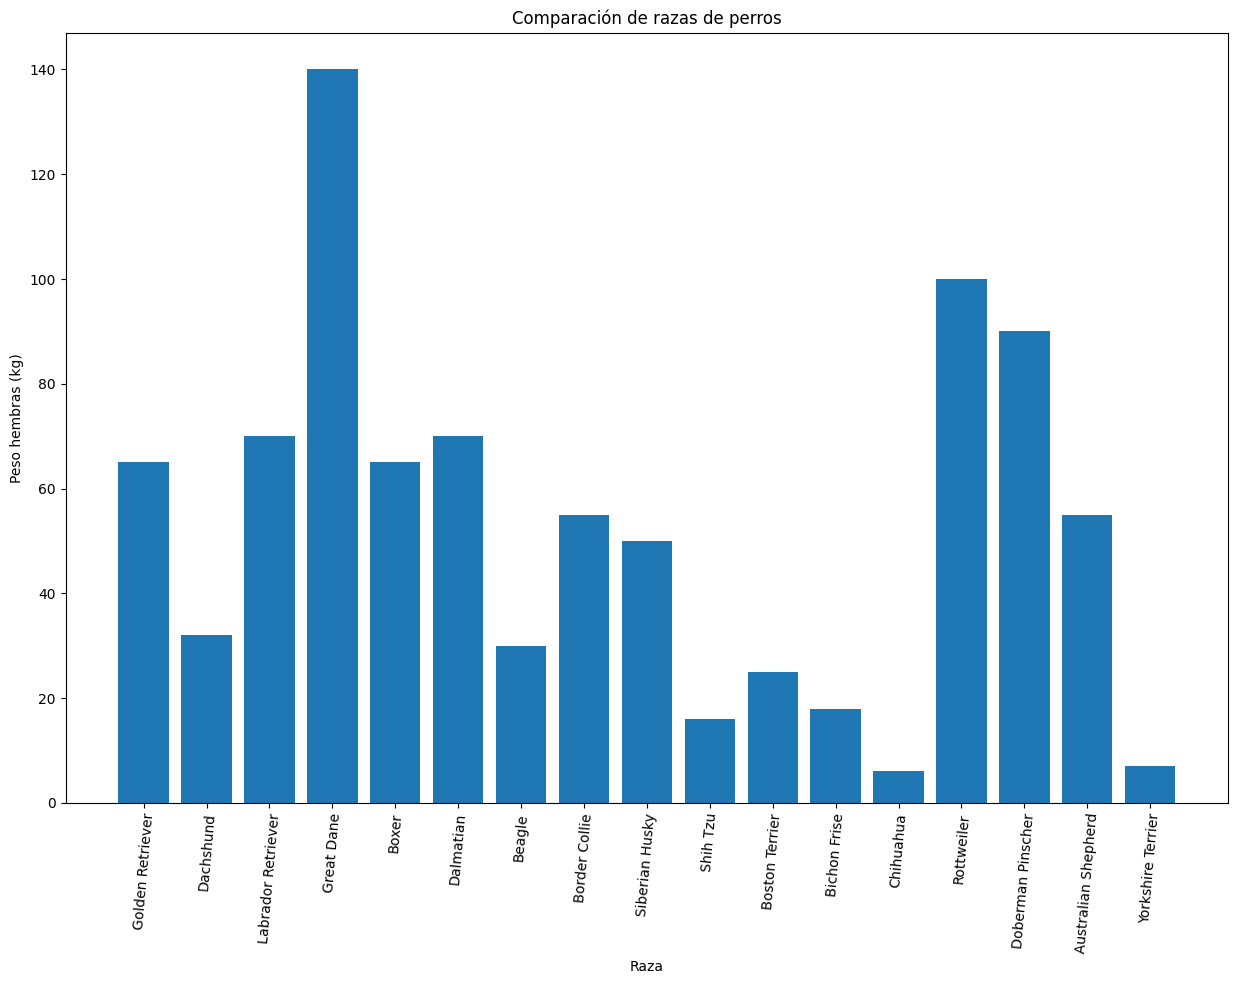

In [23]:
import matplotlib.pyplot as plt

# Seleccionamos 20 razas de perros
breeds = ['Labrador Retriever', 'Chihuahua', 'German Shepherd', 'Golden Retriever', 'Bulldog', 'Poodle', 'Siberian Husky', 'Dalmatian', 'Boxer', 'Shih Tzu', 'Beagle', 'Rottweiler', 'Doberman Pinscher', 'Great Dane', 'Dachshund', 'Border Collie', 'Yorkshire Terrier', 'Australian Shepherd', 'Bichon Frise', 'Boston Terrier']
selected_breeds = dog_df.loc[dog_df['Name'].isin(breeds)]

# Creamos un gráfico de barras
plt.figure(figsize=(15,10))  # El primer valor es el ancho y el segundo valor es la altura
plt.bar(x=selected_breeds['Name'], height=selected_breeds['max_weight_female'])
plt.xticks(rotation=85)  # Rotar los nombres de las razas para que sean legibles
plt.xlabel('Raza')
plt.ylabel('Peso hembras (kg)')
plt.title('Comparación de razas de perros')




Text(0.5, 1.0, 'Comparación de razas de perros')

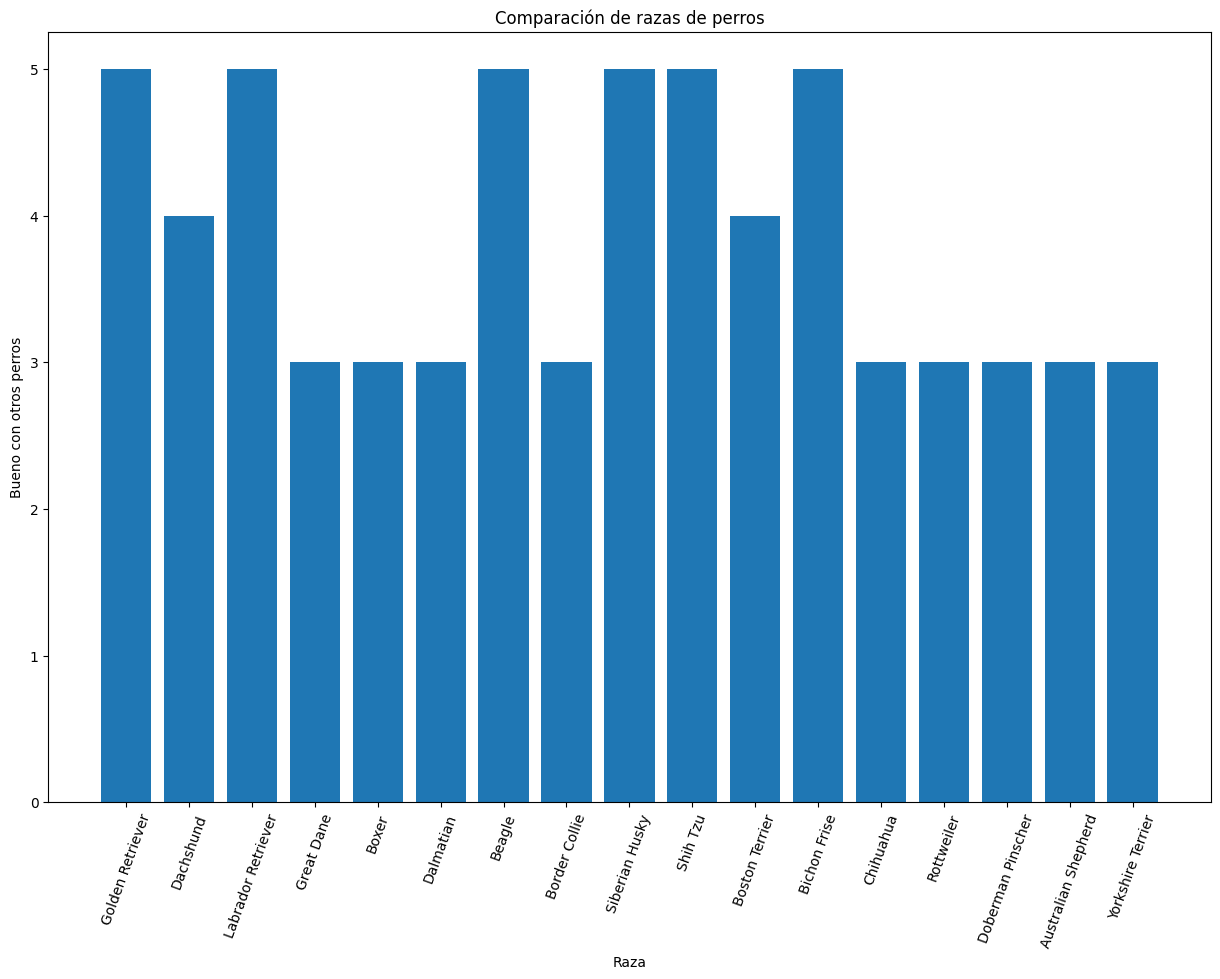

In [24]:
import matplotlib.pyplot as plt

# Seleccionamos las 20 razas de perros
breeds = ['Labrador Retriever', 'Chihuahua', 'German Shepherd', 'Golden Retriever', 'Bulldog', 'Poodle', 'Siberian Husky', 'Dalmatian', 'Boxer', 'Shih Tzu', 'Beagle', 'Rottweiler', 'Doberman Pinscher', 'Great Dane', 'Dachshund', 'Border Collie', 'Yorkshire Terrier', 'Australian Shepherd', 'Bichon Frise', 'Boston Terrier']
selected_breeds = dog_df.loc[dog_df['Name'].isin(breeds)]

# Creamos un gráfico de barras
plt.figure(figsize=(15,10))  # El primer valor es el ancho y el segundo valor es la altura
plt.bar(x=selected_breeds['Name'], height=selected_breeds['good_with_other_dogs'])
plt.xticks(rotation=70)  # Rotar los nombres de las razas para que sean legibles
plt.xlabel('Raza')
plt.ylabel('Bueno con otros perros')
plt.title('Comparación de razas de perros')


In [25]:
# Encontramos el valor máximo y mínimo de la columna "max_weight_female"
max_weight_female_max = dog_df['max_weight_female'].max()
max_weight_female_min = dog_df['max_weight_female'].min()

# Mostramos los valores encontrados
print("Valor máximo de max_weight_female: ", max_weight_female_max)
print("Valor mínimo de max_weight_female: ", max_weight_female_min)


Valor máximo de max_weight_female:  200.0
Valor mínimo de max_weight_female:  6.0


In [26]:
# Encontramos el índice de la fila con el valor máximo de "max_weight_female"
max_weight_female_max_index = dog_df['max_weight_female'].idxmax()

# Obtenemos la raza correspondiente al índice encontrado
max_weight_female_max_breed = dog_df.loc[max_weight_female_max_index, 'Name']

# Mostramos la raza correspondiente al valor máximo de "max_weight_female"
print("Raza con el valor máximo de max_weight_female: ", max_weight_female_max_breed)
# Encontramos el índice de la fila con el valor máximo de "max_weight_female"
max_weight_female_max_index = dog_df['max_weight_female'].idxmax()


Raza con el valor máximo de max_weight_female:  Boerboel


In [27]:
# Encontramos el índice de la fila con el valor máximo y mínimo de la columna "max_weight_female"
max_weight_female_max_idx = dog_df['max_weight_female'].idxmax()
max_weight_female_min_idx = dog_df['max_weight_female'].idxmin()

# Obtenemos la raza asociada a cada valor máximo y mínimo
max_weight_female_max_breed = dog_df.loc[max_weight_female_max_idx, 'Name']
max_weight_female_min_breed = dog_df.loc[max_weight_female_min_idx, 'Name']

# Mostramos los valores encontrados
print("Valor máximo de max_weight_female: ", dog_df['max_weight_female'].max(), " (raza: ", max_weight_female_max_breed, ")")
print("Valor mínimo de max_weight_female: ", dog_df['max_weight_female'].min(), " (raza: ", max_weight_female_min_breed, ")")



Valor máximo de max_weight_female:  200.0  (raza:  Boerboel )
Valor mínimo de max_weight_female:  6.0  (raza:  Chihuahua )


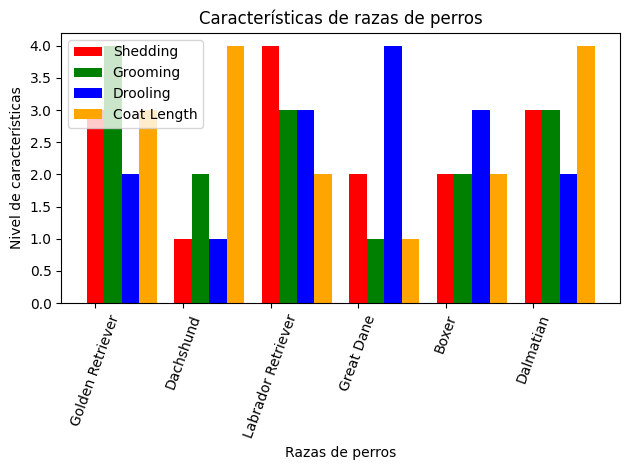

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las características de las razas de perros
razas = ['Golden Retriever', 'Dachshund', 'Labrador Retriever', 'Great Dane', 'Boxer', 'Dalmatian']
caracteristicas = ['Shedding', 'Grooming', 'Drooling', 'Coat Length']
datos = {
    'Shedding': [3, 1, 4, 2, 2, 3],
    'Grooming': [4, 2, 3, 1, 2, 3],
    'Drooling': [2, 1, 3, 4, 3, 2],
    'Coat Length': [3, 4, 2, 1, 2, 4]
}
colores = ['red', 'green', 'blue', 'orange']  # Colores para las características

# Configuración del gráfico
fig, ax = plt.subplots()
x = np.arange(len(razas))
width = 0.2

# Crear las barras individuales para cada característica
for i, caracteristica in enumerate(caracteristicas):
    ax.bar(x + i * width, datos[caracteristica], width=width, label=caracteristica, color=colores[i])
    plt.xticks(rotation=70)  # Rotar los nombres de las razas para que sean legibles
# Configuración de la apariencia del gráfico
ax.set_xlabel('Razas de perros')
ax.set_ylabel('Nivel de características')
ax.set_title('Características de razas de perros')
ax.set_xticks(x)
ax.set_xticklabels(razas)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()
